# Baseball Wins Prediction

Introduction:

This machine learning project aims to predict the number of wins for baseball teams based on various performance metrics. The dataset used for this project contains information on 30 baseball teams, including their runs scored (R), at-bats (AB), hits (H), doubles (2B), triples (3B), home runs (HR), walks (BB), strikeouts (SO), stolen bases (SB), runs allowed (RA), earned runs (ER), earned run average (ERA), complete games (CG), shutouts (SHO), saves (SV), and errors (E).

Importing the necessary libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the dataset

In [58]:
bb_df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
bb_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Data Exploration

The dataset consists of 30 rows and 17 columns. There are no missing values in the dataset, and all the columns are of numerical data types.

In [59]:
bb_df.shape

(30, 17)

In [60]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [61]:
bb_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [62]:
print(bb_df.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [63]:
bb_df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

### Feature Engineering and selection

1. Batting Average: It is calculated by dividing the total number of hits (H) by the total number of at-bats (AB).

2. On-Base Percentage (OBP): OBP is calculated by dividing the sum of hits and walks by the sum of at-bats and walks.

In [64]:
#Feature Engineering

#Batting average:
bb_df['BA'] = bb_df['H'] / bb_df['AB']

#OBP:
bb_df['OBP'] = (bb_df['H'] + bb_df['BB']) / (bb_df['AB'] + bb_df['BB'])

bb_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,BA,OBP
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,0.268520,0.315542
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,0.246753,0.302743
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0.256481,0.322840
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0.249593,0.300657
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0.270294,0.325083


In [65]:
print(bb_df.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
BA     0
OBP    0
dtype: int64


### Exploratory Data Analysis

EDA is performed to gain insights into the relationships between the input features and the target variable:
* Histograms are used to visualize the distribution of each input feature to understand the data distribution.
* Box plots are used to detect any outliers in the data.

* Scatter plots are used to observe the relationship between each input feature and the number of wins. Some features, such as 'R' (runs scored), 'HR' (home runs), and 'BB' (walks), show a positive correlation with the number of wins, while others show no significant relationship.

* Heatmap is plotted to visualize the correlation between all input features. It shows strong positive correlation between 'W' (number of wins) and 'R' (runs scored), 'HR' (home runs), 'BB' (walks), and negative correlation with 'RA' (runs allowed).

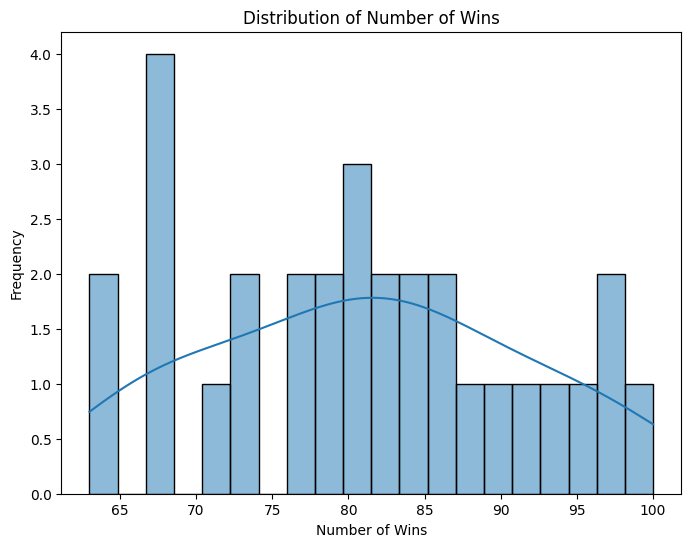

In [66]:
plt.figure(figsize=(8,6))
sb.histplot(bb_df['W'],bins=20,kde=True)
plt.xlabel("Number of Wins")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Wins")
plt.show()

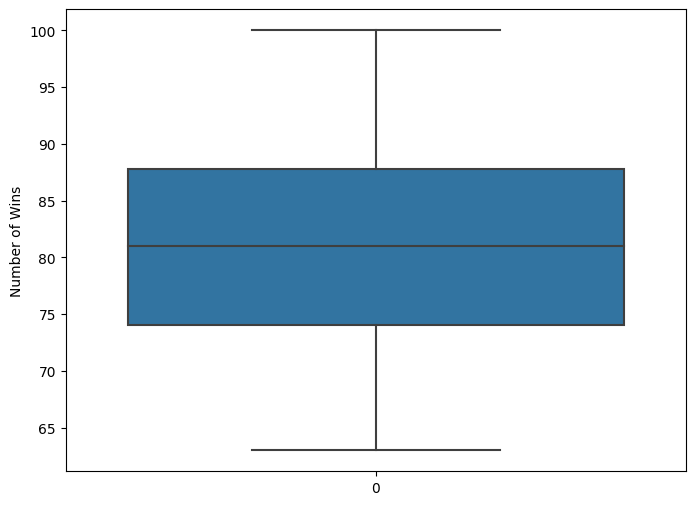

In [67]:
plt.figure(figsize=(8,6))
sb.boxplot(bb_df['W'])
plt.ylabel("Number of Wins")
plt.show()

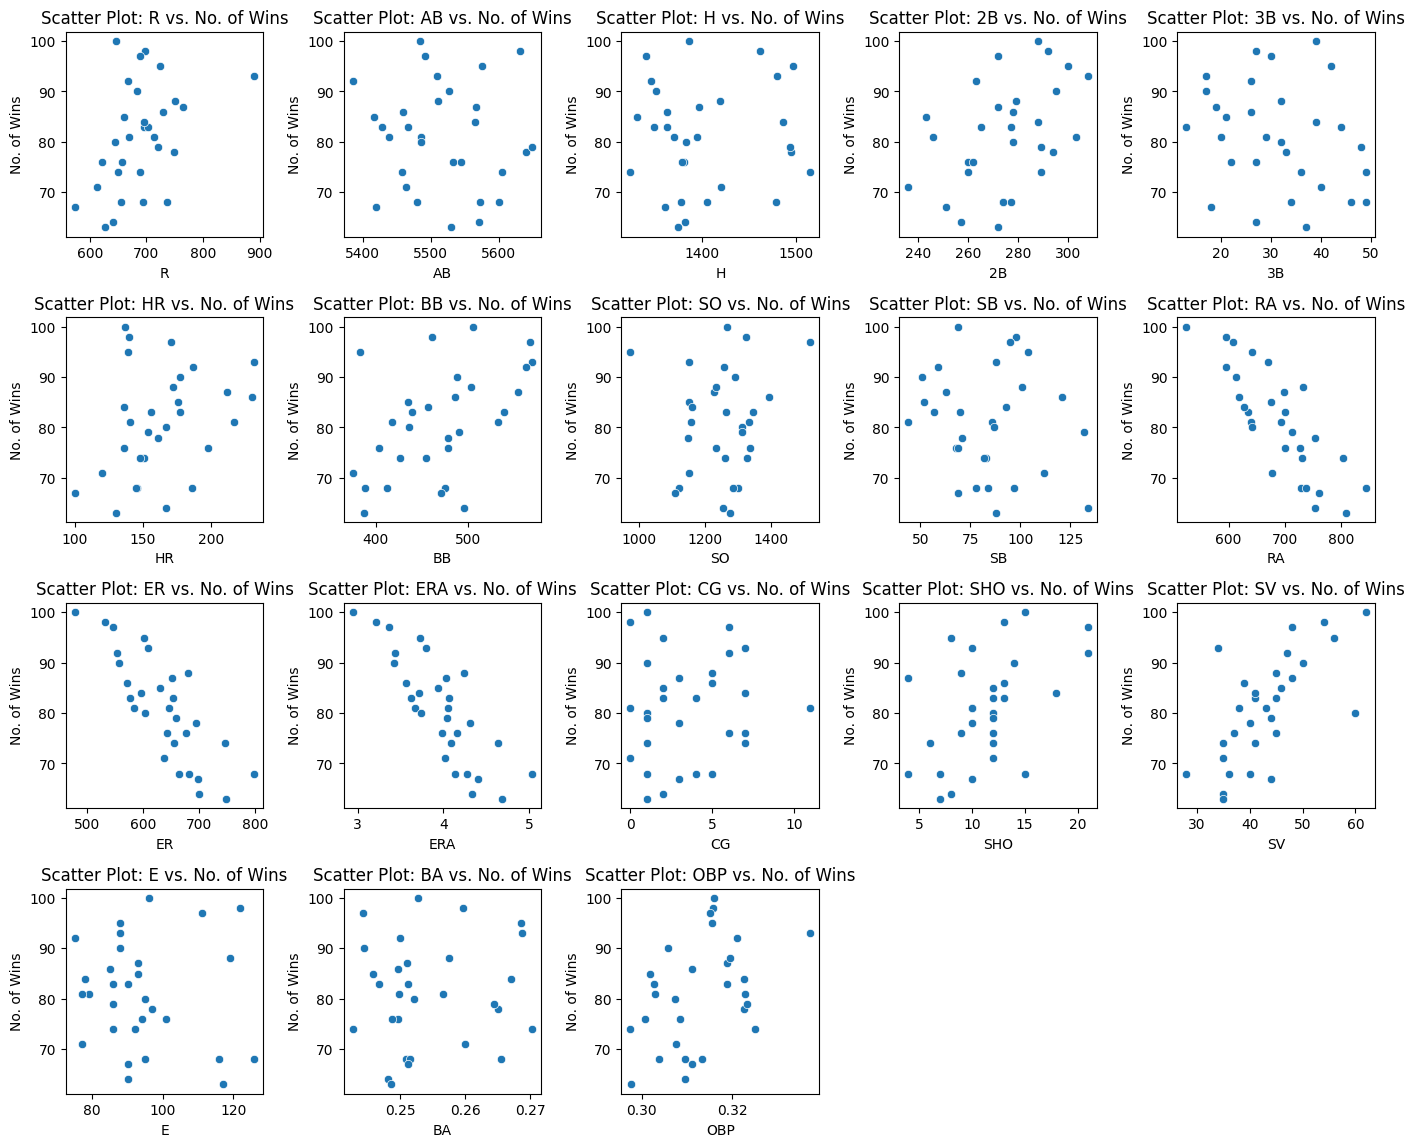

In [68]:
plt.figure(figsize=(14,14))
for i, j in enumerate(bb_df.columns[1:],1):
  plt.subplot(5,5,i)
  sb.scatterplot(x=j, y='W', data=bb_df)
  plt.xlabel(j)
  plt.ylabel('No. of Wins')
  plt.title(f'Scatter Plot: {j} vs. No. of Wins')

plt.tight_layout()
plt.show()

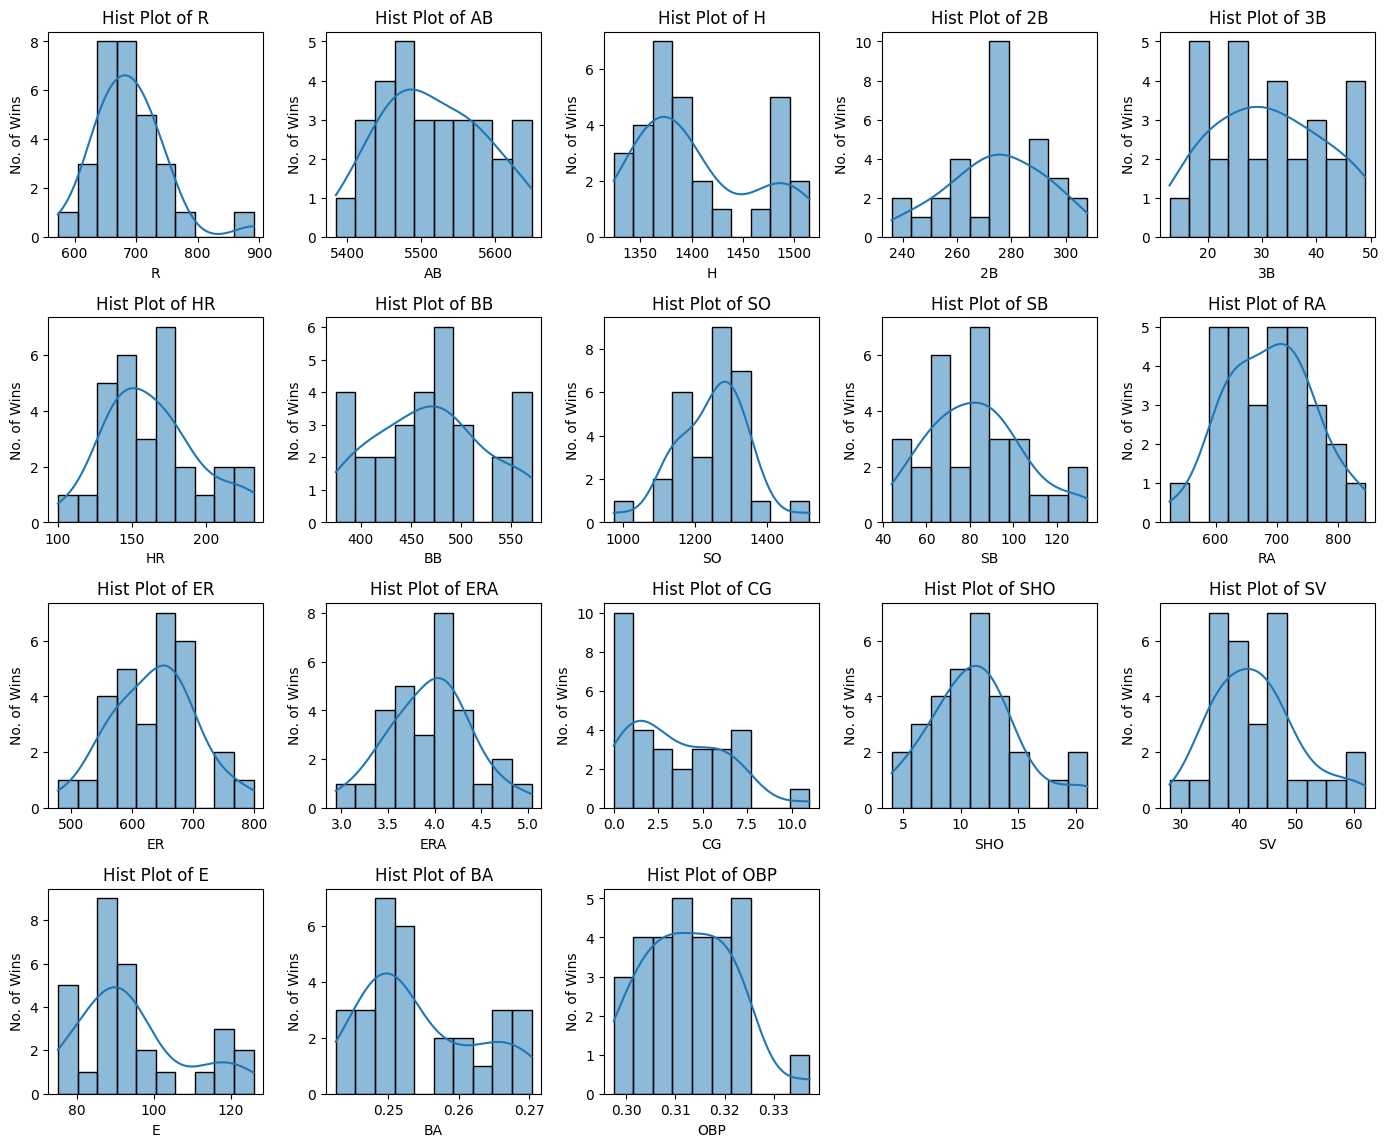

In [69]:
plt.figure(figsize=(14,14))
for i, j in enumerate(bb_df.columns[1:],1):
  plt.subplot(5,5,i)
  sb.histplot(data=bb_df, x = j, kde=True, bins=10)
  plt.xlabel(j)
  plt.ylabel('No. of Wins')
  plt.title(f'Hist Plot of {j}')

plt.tight_layout()
plt.show()

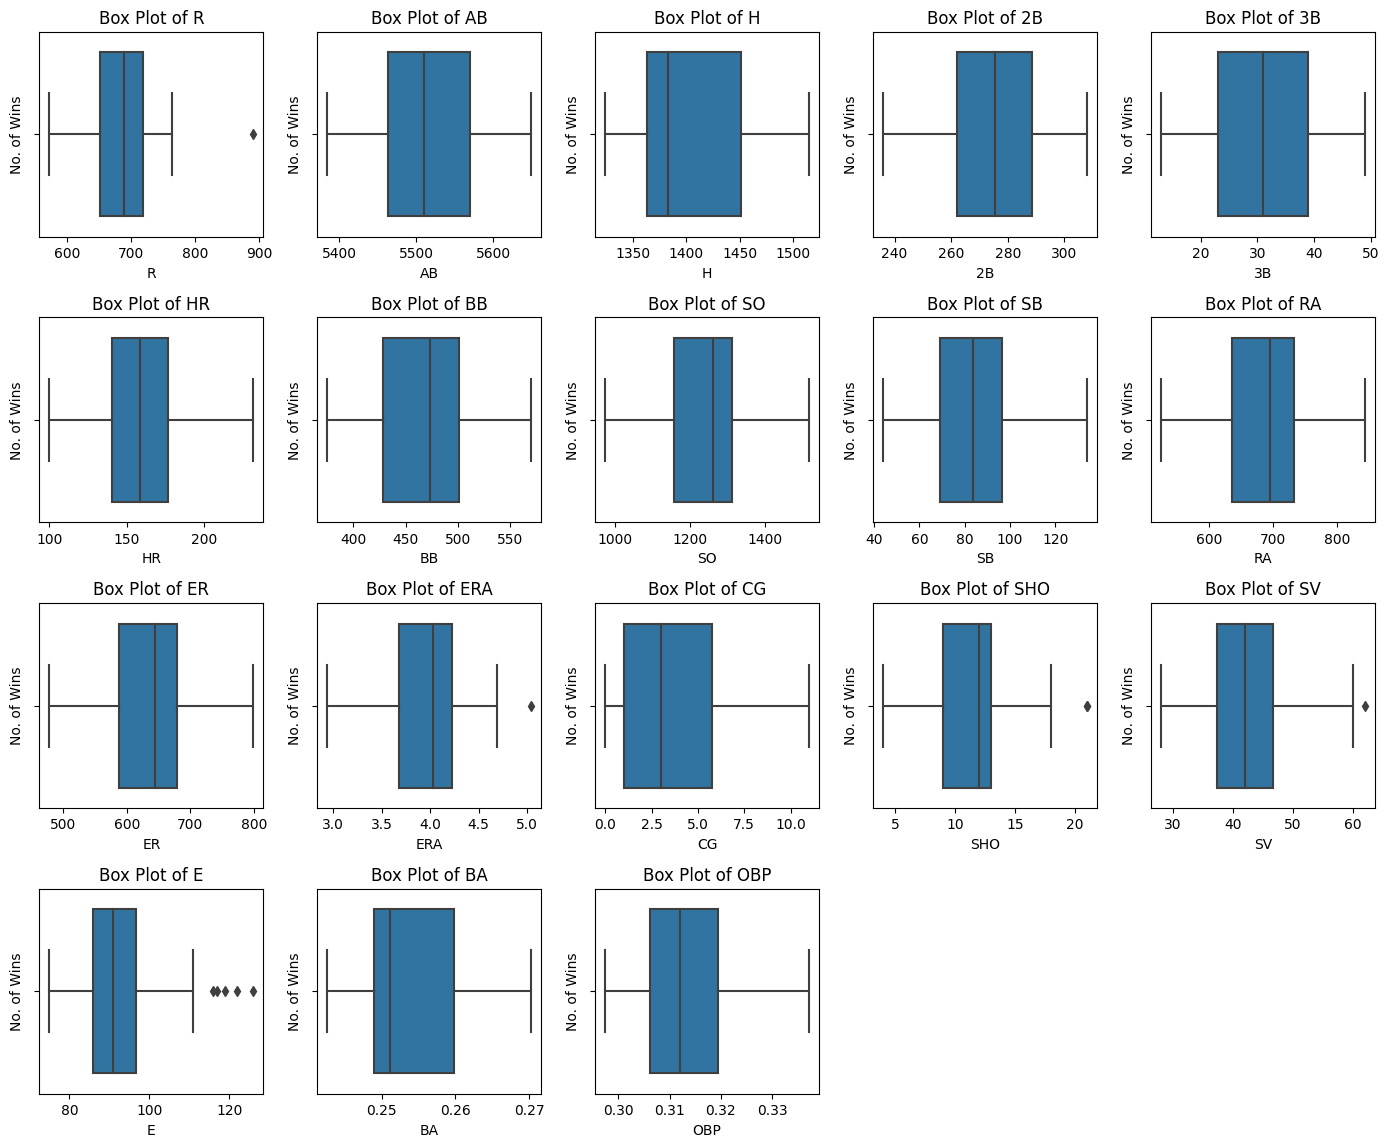

In [70]:
plt.figure(figsize=(14,14))
for i, j in enumerate(bb_df.columns[1:],1):
  plt.subplot(5,5,i)
  sb.boxplot(data=bb_df, x = j)
  plt.xlabel(j)
  plt.ylabel('No. of Wins')
  plt.title(f'Box Plot of {j}')

plt.tight_layout()
plt.show()

In [71]:
correlation_matrix = bb_df.corr()
print(correlation_matrix)

            W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   

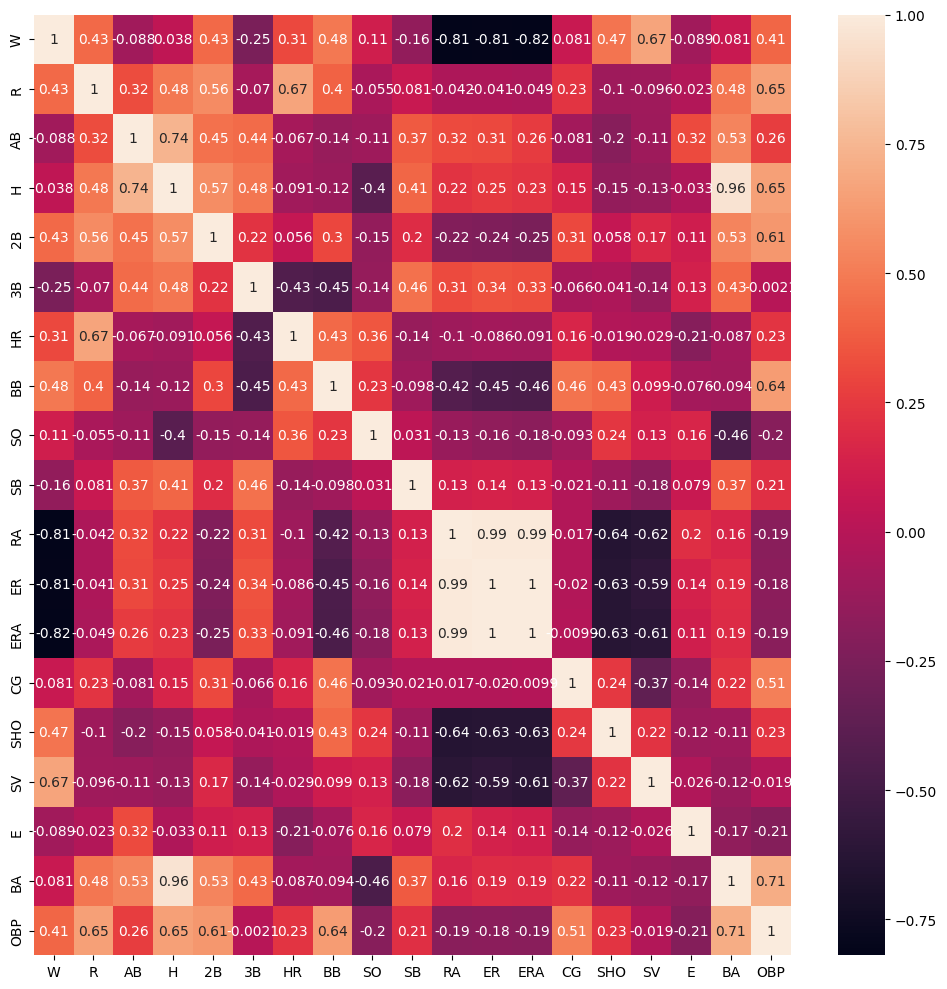

In [72]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()

# Data Preprocessing and Feature Selection

In [73]:
X = bb_df.drop(['W','AB','H','BB'],axis=1)

In [74]:
y = bb_df['W']

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

## Model Building and evaluation

Multiple models are built using the following algorithms:



*  Linear Regression
*  Decision Tree Regressor
*  Random Forest Regression
*  XGBoost
*  Support Vector Regressor (SVM)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print("Linear Regression:")
print("MSE -", mse_lin_reg, "\nR-squared -", r2_lin_reg)


#DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)
print("\nDecision Tree Regressor:")
print("MSE -", mse_dt_reg, "\nR-squared -", r2_dt_reg)

#Random Forest Regression

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
print("\nRandom Forest Regression:")
print("MSE -", mse_rf_reg, "\nR-squared -", r2_rf_reg)

# XGBoost

xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred_xg_reg = xg_reg.predict(X_test)
mse_xg_reg = mean_squared_error(y_test, y_pred_xg_reg)
r2_xg_reg = r2_score(y_test, y_pred_xg_reg)
print("\nXG Boost:")
print("MSE -", mse_xg_reg, "\nR-squared -", r2_xg_reg)

#SVM
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm_reg = svm_reg.predict(X_test)
mse_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)
r2_svm_reg = r2_score(y_test, y_pred_svm_reg)
print("\nXG Boost:")
print("MSE -", mse_svm_reg, "\nR-squared -", r2_svm_reg)

Linear Regression:
MSE - 33.57803733910779 
R-squared - 0.7506581385709818

Decision Tree Regressor:
MSE - 112.44444444444444 
R-squared - 0.16501650165016502

Random Forest Regression:
MSE - 40.3631 
R-squared - 0.7002740099009901

XG Boost:
MSE - 58.21213931373657 
R-squared - 0.5677316387593819

XG Boost:
MSE - 118.4498425475233 
R-squared - 0.12042196128076754


# Model Selection and Evaluation

Model performance is evaluated using Mean Squared Error (MSE) and R-squared metrics. Based on the evaluation, the Linear Regression model performs the best with the lowest MSE and highest R-squared value.

In [78]:
y_train_pred = lin_reg.predict(X_train)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Training Set:")
print(f"MSE: {mse_train}")
print(f"R-squared: {r2_train}")

y_test_pred = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Testing Set:")
print(f"MSE: {mse_test}")
print(f"R-squared: {r2_test}")

Training Set:
MSE: 1.6818481888762093
R-squared: 0.9819045805773785
Testing Set:
MSE: 33.57803733910779
R-squared: 0.7506581385709818


Model is overfitting as MSE and R2 values are better for training set.

### Hyperparameter Tuning

Grid Search is used to find the best alpha value for Ridge Regression, which improves the model performance.

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_reg = Ridge()

param_grid = {'alpha': [0.001, 0.01,0.1,1,10,100]}

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge_reg = grid_search.best_estimator_

best_ridge_reg.fit(X_train, y_train)

y_pred_ridge = best_ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Best Alpha:", best_alpha)
print("Best MSE:", mse_ridge)
print("Best R-squared:", r2_ridge)

Best Alpha: 10
Best MSE: 24.804194253228687
Best R-squared: 0.8158104387136484


## Cross Validation

Cross-validation is performed to assess the model's performance on different subsets of the data.

In [85]:
from sklearn.model_selection import cross_val_score
scores_cross_val = cross_val_score(ridge_reg, X_train, y_train, cv=5)
avg_cross_val = scores_cross_val.mean()
print("Cross Validation Score: ",scores_cross_val)
print("Average Cross Validation Score: ",avg_cross_val)


Cross Validation Score:  [0.83014712 0.62421298 0.1903215  0.83727749 0.78474997]
Average Cross Validation Score:  0.6533418110407226


 The average cross-validation score is approximately 0.653, indicating reasonable stability and robustness of the model.

## Plotting the results

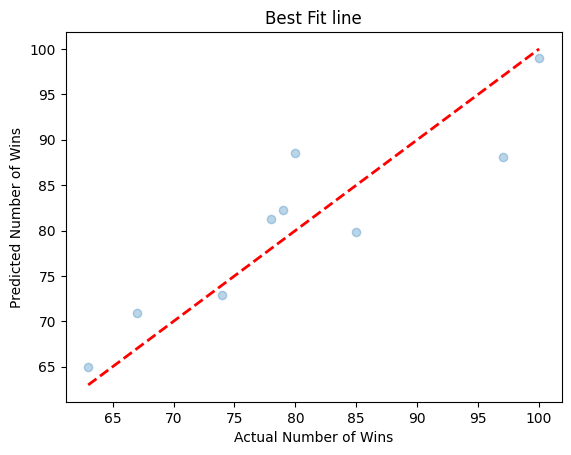

In [86]:
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linestyle='--',linewidth=2)
plt.xlabel('Actual Number of Wins')
plt.ylabel('Predicted Number of Wins')
plt.title('Best Fit line')
plt.show()

## Final Model

In [89]:
#Making predictions using the model

input = [[559,	272,	30,	171,	567,	95,	608,	546,	3.36,	6,	21,	48,	111,	0.244218,	0.314955]]
input_scaled = scaler.fit_transform(input)
predictions = best_ridge_reg.predict(input_scaled)
print(predictions)

[81.13139793]


In conclusion, the Linear Regression model with regularization performs well in predicting the number of wins for baseball teams. The regularization helps in reducing overfitting and improving the model's robustness